<a href="https://colab.research.google.com/github/Maystrix/Lin_Reg---Car_Dekho-dataset/blob/main/Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
dataset=pd.read_csv("/content/drive/MyDrive/Almabetter/Assignments/Linear Regression/Self Project/Copy of CAR DETAILS FROM CAR DEKHO.csv")

##Data Inspection

In [ ]:
dataset.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti Alto LX BSIII,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai Xcent 1.2 Kappa S,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata Indigo Grand Petrol,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai Creta 1.6 VTVT S,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti Celerio Green VXI,2017,365000,78000,CNG,Individual,Manual,First Owner


In [ ]:
dataset.shape

(4340, 8)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
dataset.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [ ]:
len(dataset[dataset.duplicated()])

763

In [ ]:
dataset[dataset.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


In [ ]:
dataset.drop_duplicates()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [ ]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

## Exploratory Data Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


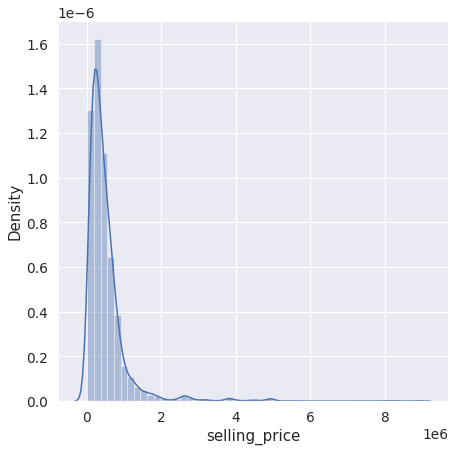

In [ ]:
# Dependent variable price
plt.figure(figsize = (7,7))
sns.distplot(dataset['selling_price'])

The above graph is positively skewed. To decrease the skewness and induce some normal distribution we use log transformation


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


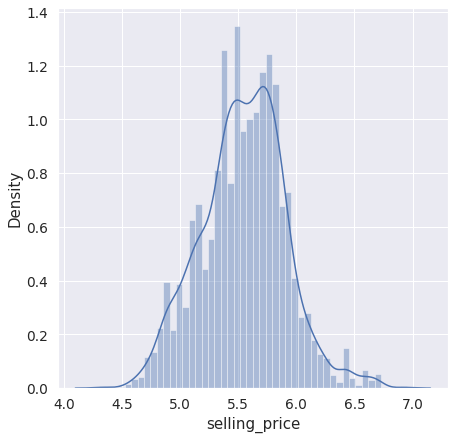

In [ ]:
# Decreasing skewness by using log transformation
plt.figure(figsize = (7,7))
sns.distplot(np.log10(dataset['selling_price']))

## Numeric Features

In [ ]:
numeric_features = dataset.describe().columns
numeric_features

Index(['year', 'selling_price', 'km_driven'], dtype='object')

##Skewness plots for Numeric features

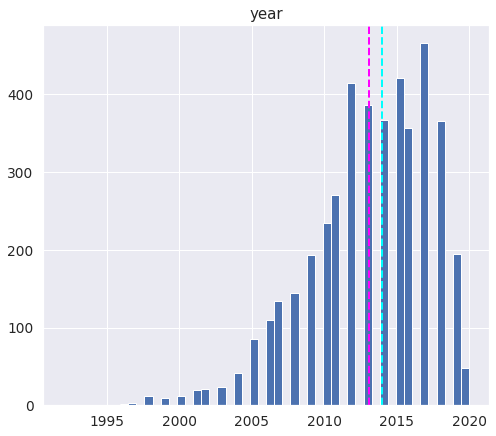

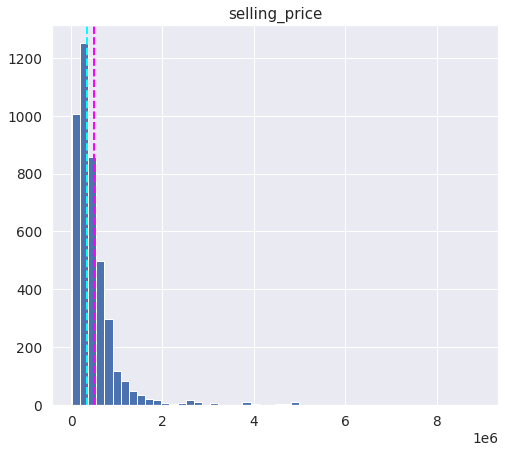

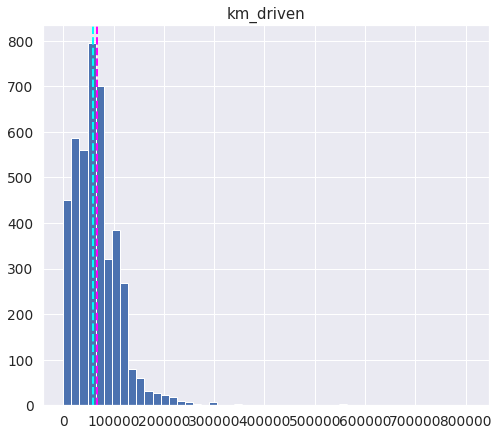

In [ ]:
# plot a bar graph for each numeric feature count

for col in numeric_features[0:]:
  fig = plt.figure(figsize=(8,7))
  ax = fig.gca()              # gca --> Get Current Axis 
  # applying graphical features to dataset  
  feature = dataset[col]
  feature.hist(bins=50, ax=ax)
  # applying mean, median lines to graph
  ax.axvline(feature.mean(), color='magenta', linestyle = 'dashed', linewidth=2)       
  ax.axvline(feature.median(), color='cyan', linestyle = 'dashed', linewidth=2)  
  # set title
  ax.set_title(col)
plt.show()

From the above graphs it can be observed that there is a very little skewness in all of the variables and most of the graphs follow a normal distribution.

##Correlation plots for numeric features

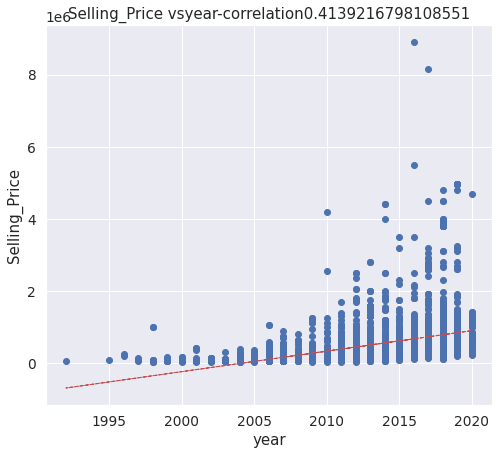

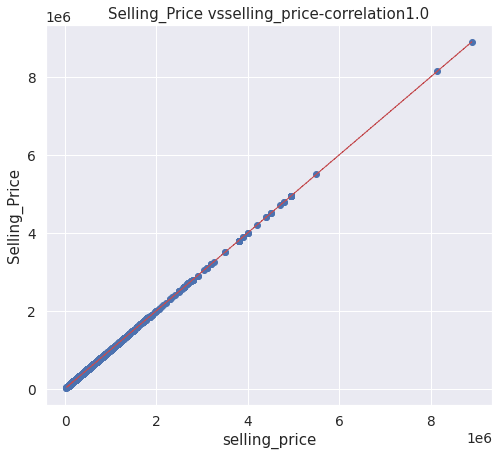

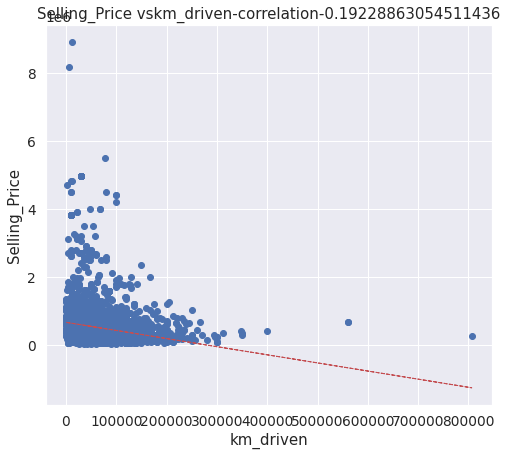

In [ ]:
# scatter plot for each numeric feature
for col in numeric_features[0:]:
    fig = plt.figure(figsize=(8,7))
    ax= fig.gca()
    # choosing the dataset(X-axis & Y-axis) for the graph
    feature = dataset[col]
    label = dataset['selling_price']
    # correlation function 
    correlation = feature.corr(label)
    # plot fot correlation
    plt.scatter(x=feature, y=label)   
    plt.xlabel(col)
    plt.ylabel('Selling_Price') 
    ax.set_title('Selling_Price vs'+ col + '-correlation' + str(correlation))     # str(correlation) --> displays the correlation value bet two labels(variables)
    # drawing a straight line through graph (L-R)
    z = np.polyfit(dataset[col] , dataset['selling_price'], 1)      # fit a ploynomial (least square) of degree 1 to the points (col , price)
    y_hat = np.poly1d(z)(dataset[col])             #  fitting the (col, price) values in 1d polynomial 

    plt.plot(dataset[col], y_hat, "r--", lw=1)
plt.show()

There is a negative correlation between **Selling_Price ** and **Km_driven**

Which is true , as selling_price should decrease with the increase in km_driven by the vehicle


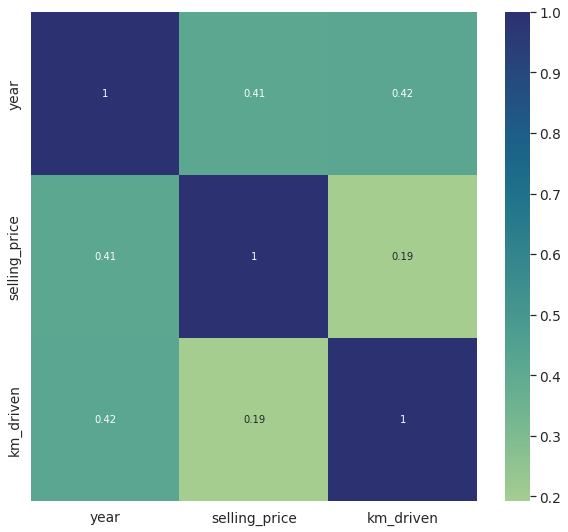

In [ ]:
# Checking Correlation using Heatmap
plt.figure(figsize = (10,9))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap = 'crest')

There is no Multi-collinearity in this dataset 

Hence, the numeric features remain same

In [ ]:
numerical_features = ['year', 'km_driven' ]

In [ ]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
dataset['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [ ]:
dataset['Company'] = dataset['name'].str.split(" ", expand=True)[0]
#dataset['Company'] = dataset['Company'].replace({})
dataset['Company'].value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: Company, dtype: int64

It can be seen that **Maruti** has maximum amount of listings . 

Whereas, there are some companies (some of them sub-brands under major companies) with very less listing.

We can either merge them with their parent-organization or drop them if their selling_price is also not significant compared to Major companies

<Figure size 720x576 with 0 Axes>

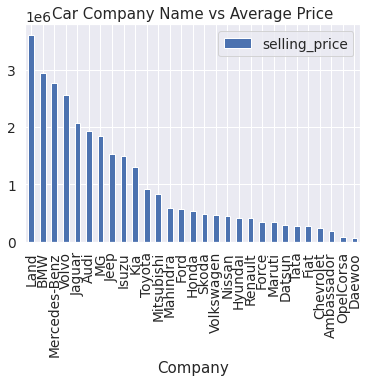

In [ ]:
plt.figure(figsize=(10, 8))

df_autox = pd.DataFrame(dataset.groupby(['Company'])['selling_price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

From the above plot , we can see that although **Land** has only 1 car listed on CarDekho but it has the maximum Selling_Price among all the companies listed.

We can drop the foll. companies : **Daewoo** , **OpelCorsa** , **Force**

We can merge the companies **MG**, **Jeep** , **Mitsubishi** , **Datsun**, **Fiat** , **Ambassador** in others column

We can also merge **Skoda**, **Audi** , **BMW**, **Mercedez-Benz** , **Land** into premium group.

## Categorical Features

In [ ]:
categorical_features = dataset.describe(include = ['object', 'category']).columns
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'Company'], dtype='object')

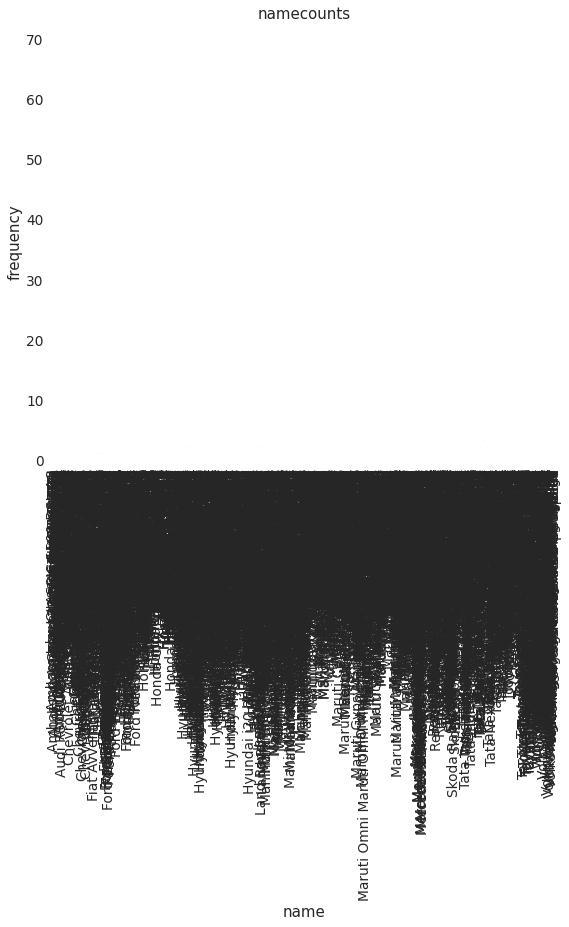

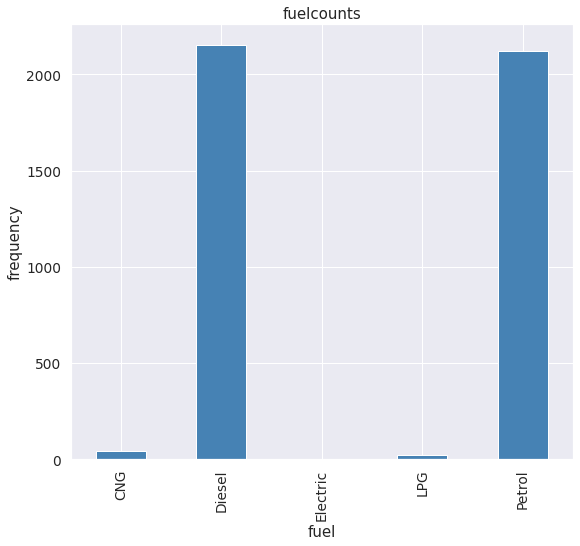

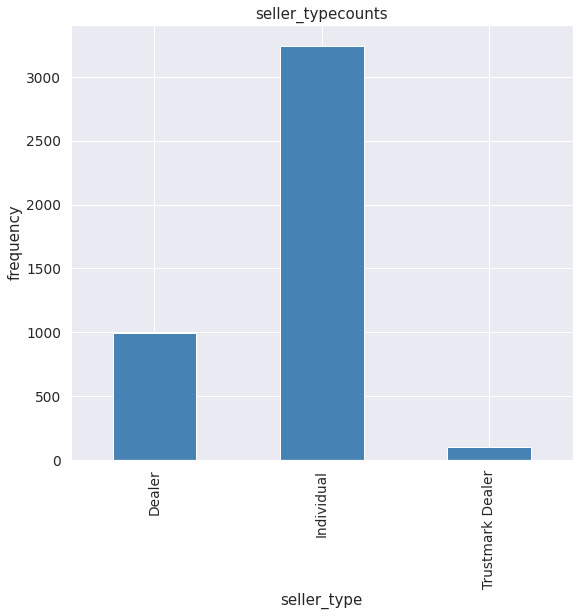

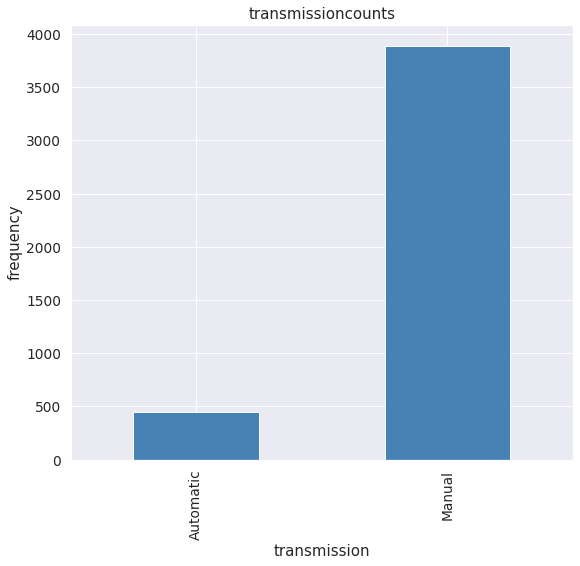

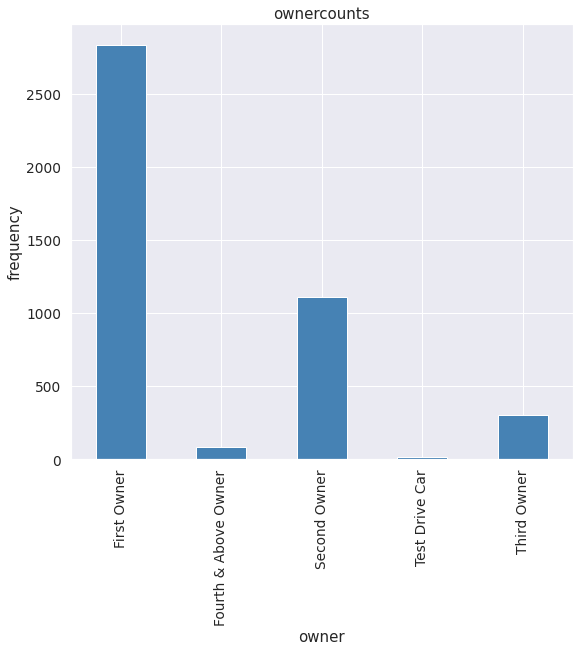

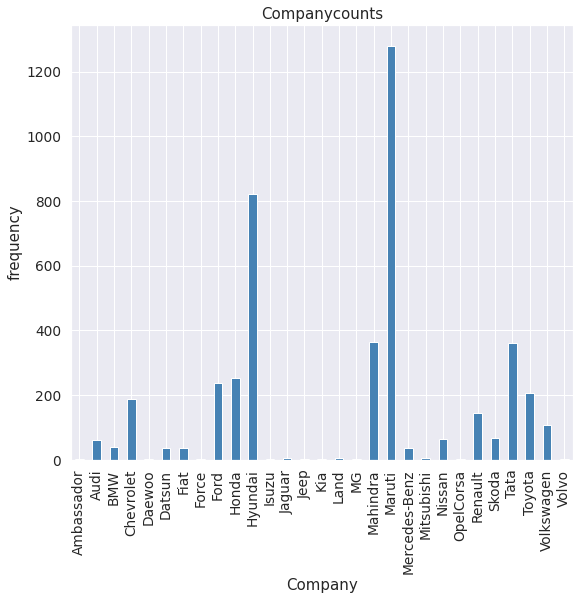

In [ ]:
for col in categorical_features[0:]:
  counts =dataset[col].value_counts().sort_index()
  fig = plt.figure(figsize = (9,8))
  ax=fig.gca()
  counts.plot.bar(ax=ax, color='steelblue')
  ax.set_title(col+'counts')
  ax.set_xlabel(col)
  ax.set_ylabel("frequency")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

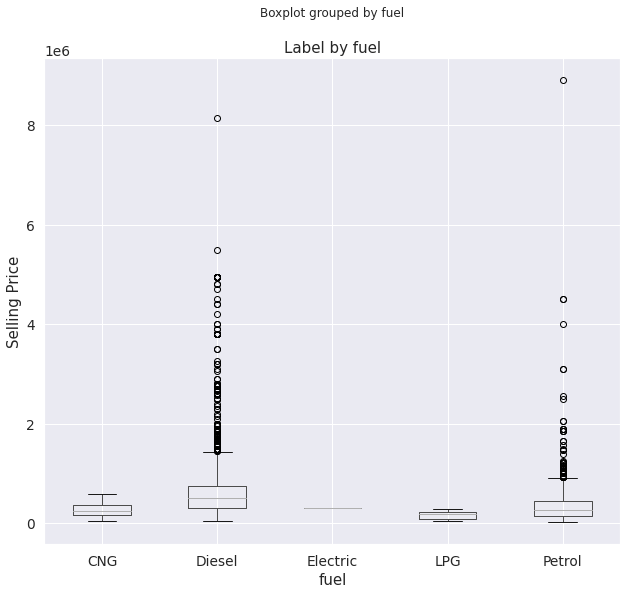

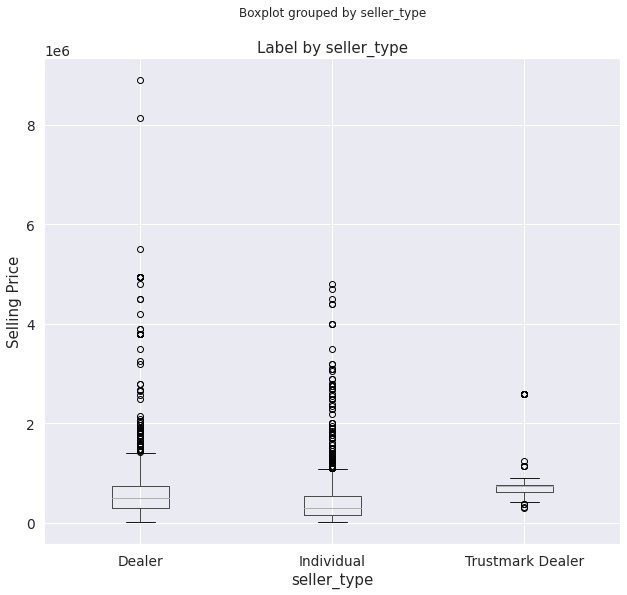

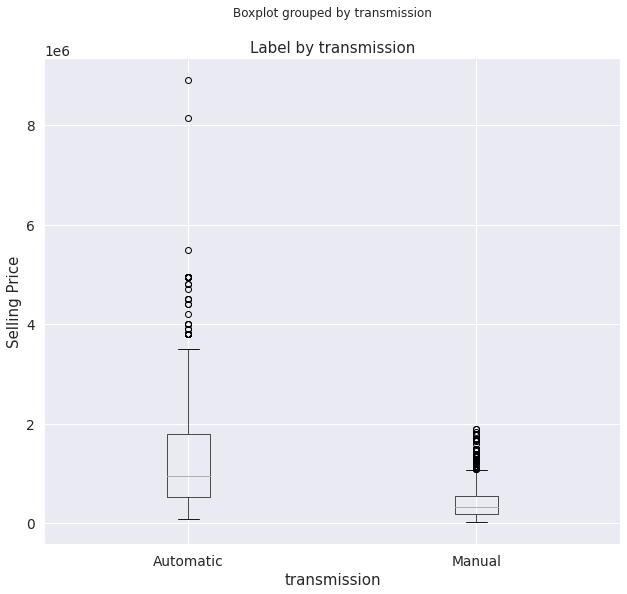

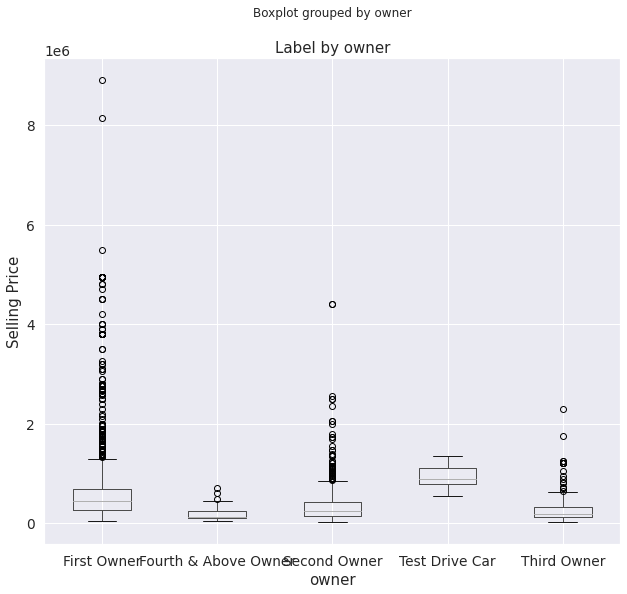

In [ ]:
# boxplotfor comparing Selling price with other categorical features
for col in categorical_features[1:-1]:
  fig = plt.figure(figsize=(10,9))
  ax =fig.gca()
  dataset.boxplot(column = 'selling_price', by = col, ax=ax)
  ax.set_title("Label by " + col)
  ax.set_ylabel("Selling Price")
plt.show()

In [ ]:
counts = dataset['owner'].value_counts()
counts

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

** Fourth & Above Owner ** has a very little significance on the selling_price which suggests that customers generally don't prefer a vehicle that has been sold consequetively

In [ ]:
counts = dataset['fuel'].value_counts()
counts

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

We can completely drop **Electric** from the features & 

merge **CNG** & **LPG** into 1 feature

In [ ]:
counts = dataset['seller_type'].value_counts()
counts

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

We can merge **Dealer** and **Trustmark Dealer** 

## Data Manipulation according to above Analysis

In [ ]:
# creating a copy of dataset
df = dataset.copy(deep =True)

In [ ]:
df['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [ ]:
# dropping the 'Fourth owner values ' from owner col
df.drop(df[df['owner']=='Fourth & Above Owner'].index , inplace= True)
df['owner'].value_counts()

First Owner       2832
Second Owner      1106
Third Owner        304
Test Drive Car      17
Name: owner, dtype: int64

In [ ]:
# dropping 'Electric' value from fuel col
df.drop(df[df['fuel']=='Electric'].index , inplace= True)
#df['Gas_cyl'] = df.merge(df[df['fuel'] == 'CNG'], df[df['fuel'] == 'LPG']).index
df['fuel'].value_counts()

Diesel    2119
Petrol    2080
CNG         37
LPG         22
Name: fuel, dtype: int64

In [ ]:
dataset.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Company'],
      dtype='object')

##Calculating VIF 

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['selling_price'] ]])

,variables,VIF
0,year,3.008187
1,km_driven,3.008187


VIF values are in acceptable range

In [ ]:
correlation.selling_price

year             0.413922
selling_price    1.000000
km_driven       -0.192289
Name: selling_price, dtype: float64

## Categorical Features

In [ ]:
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'Company'], dtype='object')

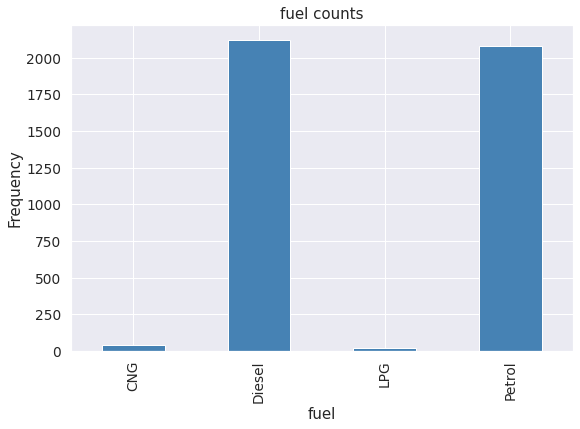

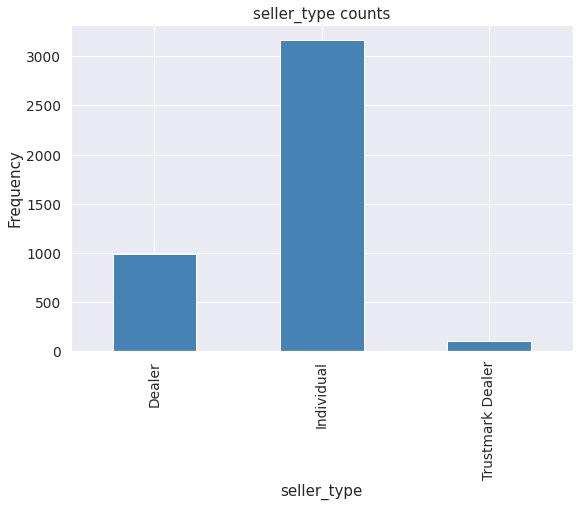

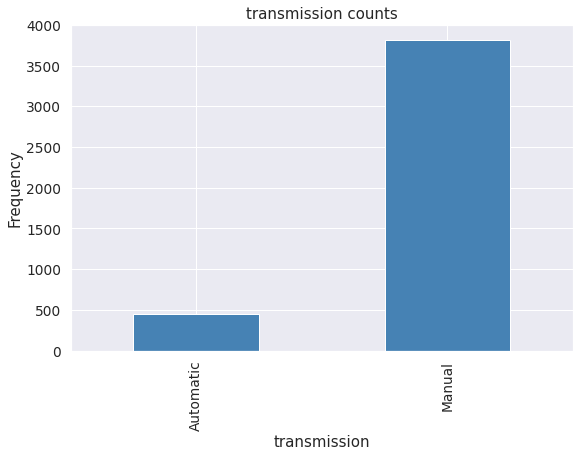

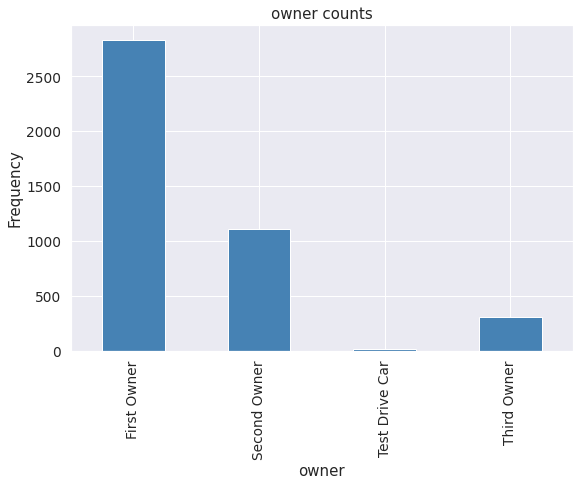

In [ ]:
# Checking frequences of categorical features
for col in categorical_features[1:-1]:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tupl

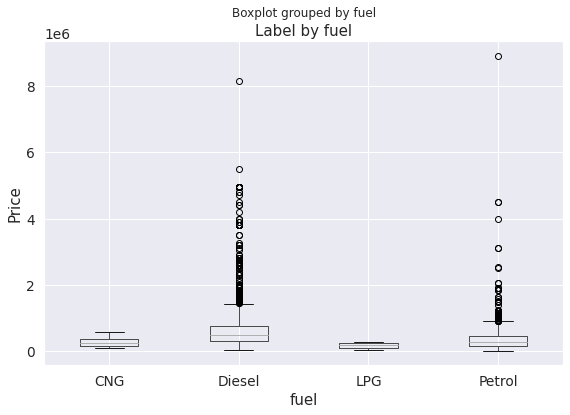

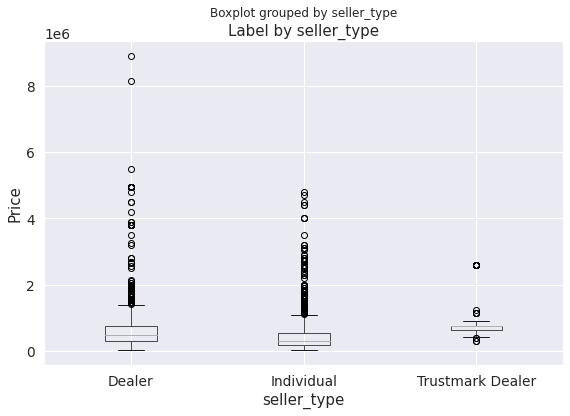

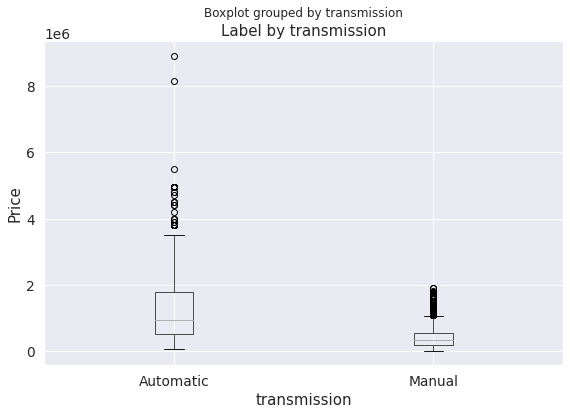

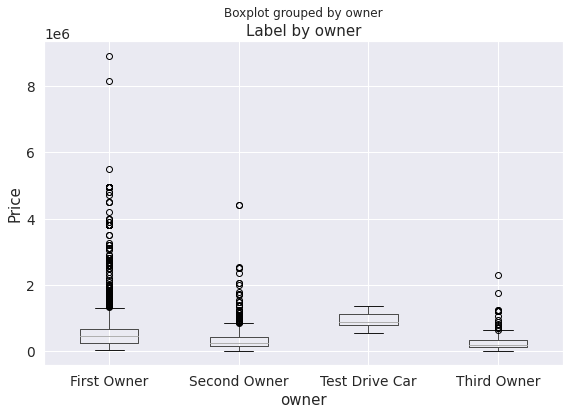

In [ ]:
# checking outliers for categorical features
for col in categorical_features[1:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'selling_price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

## One-Hot-Encoding

In [ ]:
# label encoding 
#encoders_nums = {"fueltype":{"Diesel":1,"Petrol":0},
 #                "transmission":{"Automatic":1,"Manual":0},
  #               "owner":     {"First Owner": 1, "Second Owner": 2,"Third Owner": 3, "Test Drive Car": 4 },
   #              "seller_type":{"Dealer":0,"Individual":0,"Trustmark Dealer":1},
    #             "cylindernumber":{"four": 4, "six": 6, "five": 5, "eight": 8,
      #                            "two": 2, "twelve": 12, "three":3 }
       #          }


In [ ]:
df.columns


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'Company'],
      dtype='object')

In [ ]:
# One Hot Encoding
pair_df = [df[["year", "km_driven"]], 
           pd.get_dummies(df[["owner","fuel", "seller_type", "transmission"]], 
                          drop_first=False), df[["selling_price"]]]
one_hot_df = pd.concat(pair_df , axis=1)
y = df[["selling_price"]]

# Independent Variable
one_hot_df.head()

,year,km_driven,owner_First Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,selling_price
0,2007,70000,1,0,0,0,0,0,0,1,0,1,0,0,1,60000
1,2007,50000,1,0,0,0,0,0,0,1,0,1,0,0,1,135000
2,2012,100000,1,0,0,0,0,1,0,0,0,1,0,0,1,600000
3,2017,46000,1,0,0,0,0,0,0,1,0,1,0,0,1,250000
4,2014,141000,0,1,0,0,0,1,0,0,0,1,0,0,1,450000


In [ ]:
one_hot_df.shape

(4258, 16)

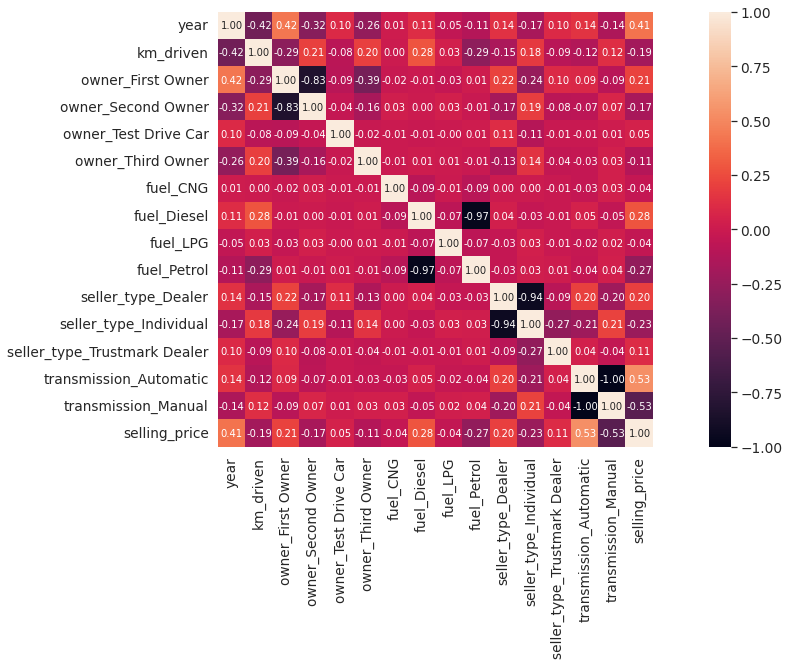

In [ ]:
plt.figure(figsize=(20,8))
corrmat = one_hot_df.corr()
cols = corrmat.index
cm = np.corrcoef(one_hot_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Linear regression algorithms

In [ ]:
one_hot_df.columns

Index(['year', 'km_driven', 'owner_First Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'fuel_CNG', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual', 'selling_price'],
      dtype='object')

In [ ]:
numerical_features

['year', 'km_driven']

In [ ]:
reg_features = numerical_features.copy()
reg_features.extend(['owner_First Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'fuel_CNG', 'fuel_Diesel',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Automatic', 'transmission_Manual'])

In [ ]:
reg_features

['year',
 'km_driven',
 'owner_First Owner',
 'owner_Second Owner',
 'owner_Test Drive Car',
 'owner_Third Owner',
 'fuel_CNG',
 'fuel_Diesel',
 'fuel_LPG',
 'fuel_Petrol',
 'seller_type_Dealer',
 'seller_type_Individual',
 'seller_type_Trustmark Dealer',
 'transmission_Automatic',
 'transmission_Manual']

In [ ]:
len(reg_features)

15

In [ ]:
# Calculating Z-score
from scipy.stats import zscore

X = one_hot_df[reg_features].apply(zscore)


In [ ]:
y = np.log10(one_hot_df['selling_price'])

In [ ]:
# Train-Test-Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state = 0)

print(X_train.shape)
print(X_test.shape)

(2980, 15)
(1278, 15)


In [ ]:
# Instanting Linear model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()   # creating a linear regression object


In [ ]:
# fitting training data
lm.fit(X_train, y_train)

LinearRegression()

In [ ]:
lm.score(X_train, y_train)

0.6842631593952837

In [ ]:
# evaluate our model by checking out the coefficients 

print(lm.intercept_)

5.549949174001018


In [ ]:
lm.coef_

array([ 2.05010466e-01, -2.96031744e-03,  4.06741061e+11,  3.77793737e+11,
        5.43463307e+10,  2.21904829e+11, -1.00306138e+12, -5.40368272e+12,
       -7.74833318e+11, -5.40231093e+12,  4.22320634e+11,  4.36543820e+11,
        1.52815977e+11,  1.67657916e+11,  1.67657916e+11])

## Predictions

In [ ]:
# passing in values that model has not seen before
y_pred = lm.predict(X_test)

In [ ]:
# predicted value
y_pred

array([5.65004683, 5.23989058, 5.36000777, ..., 5.70838881, 5.39723158,
       5.54566908])

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(10**(y_test), 10**(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 184206419115.3049
RMSE : 429192.75286904006


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(10**(y_test), 10**(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.4944333609181185
Adjusted R2 :  0.4884242487261785


Text(0.5, 1.0, 'True Selling Price V/s Predicted Selling price')

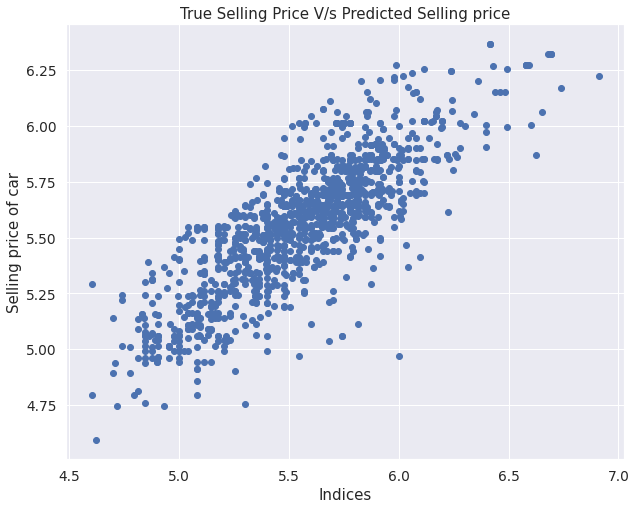

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(y_test, y_pred)
plt.xlabel('Indices')
plt.ylabel('Selling price of car')
plt.title('True Selling Price V/s Predicted Selling price')


from the above scatter plot we can conclude that , our predicted prices folllows a linear regression and are acceptable values

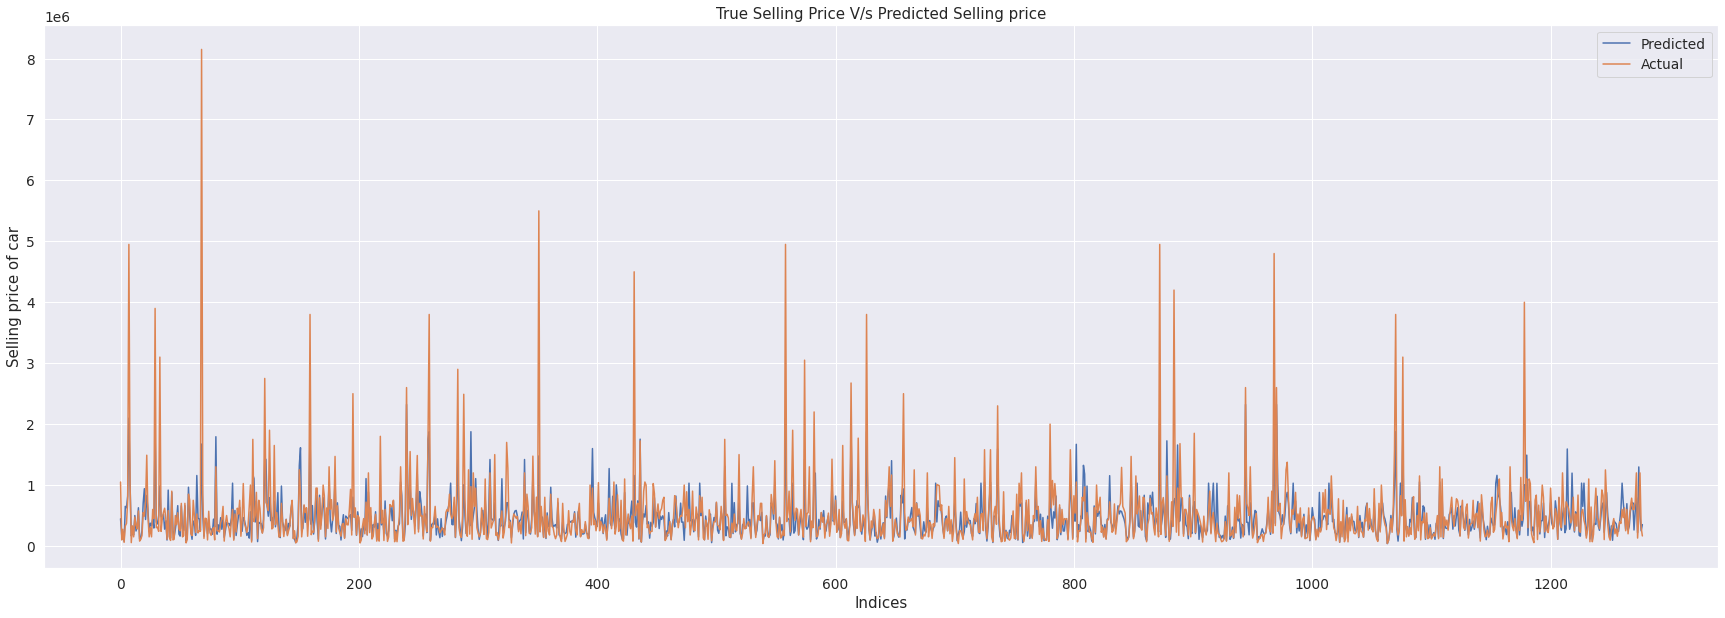

In [ ]:
# plot of actual V/s predicted prices 
plt.figure(figsize=(30, 10))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('Indices')
plt.ylabel('Selling price of car')
plt.title('True Selling Price V/s Predicted Selling price')
plt.show()

## Regularization 

### Lasso-Regression (L1 regularization)

In [ ]:
from sklearn.linear_model import Lasso

lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [ ]:
lasso.score(X_train, y_train)

0.6844011876596161

In [ ]:
lasso.coef_

array([ 2.03379104e-01, -5.18369525e-03,  1.44776895e-02, -0.00000000e+00,
        6.53195827e-03, -4.72432604e-03, -6.51268889e-04,  1.09216103e-01,
       -1.04429531e-03, -0.00000000e+00,  0.00000000e+00, -3.01682510e-02,
        2.19605470e-02,  1.07258531e-01, -4.38448897e-17])

In [ ]:
# Cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.730e+00, tolerance: 3.096e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.883e+00, tolerance: 3.183e-02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0014}

Using  {'alpha': 0.0014}  the negative mean squared error is:  -0.04160094434811863


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
y_pred_lasso

array([5.652937  , 5.23822186, 5.35779202, ..., 5.70527994, 5.40473994,
       5.5480803 ])

In [ ]:
y_pred

array([5.65004683, 5.23989058, 5.36000777, ..., 5.70838881, 5.39723158,
       5.54566908])

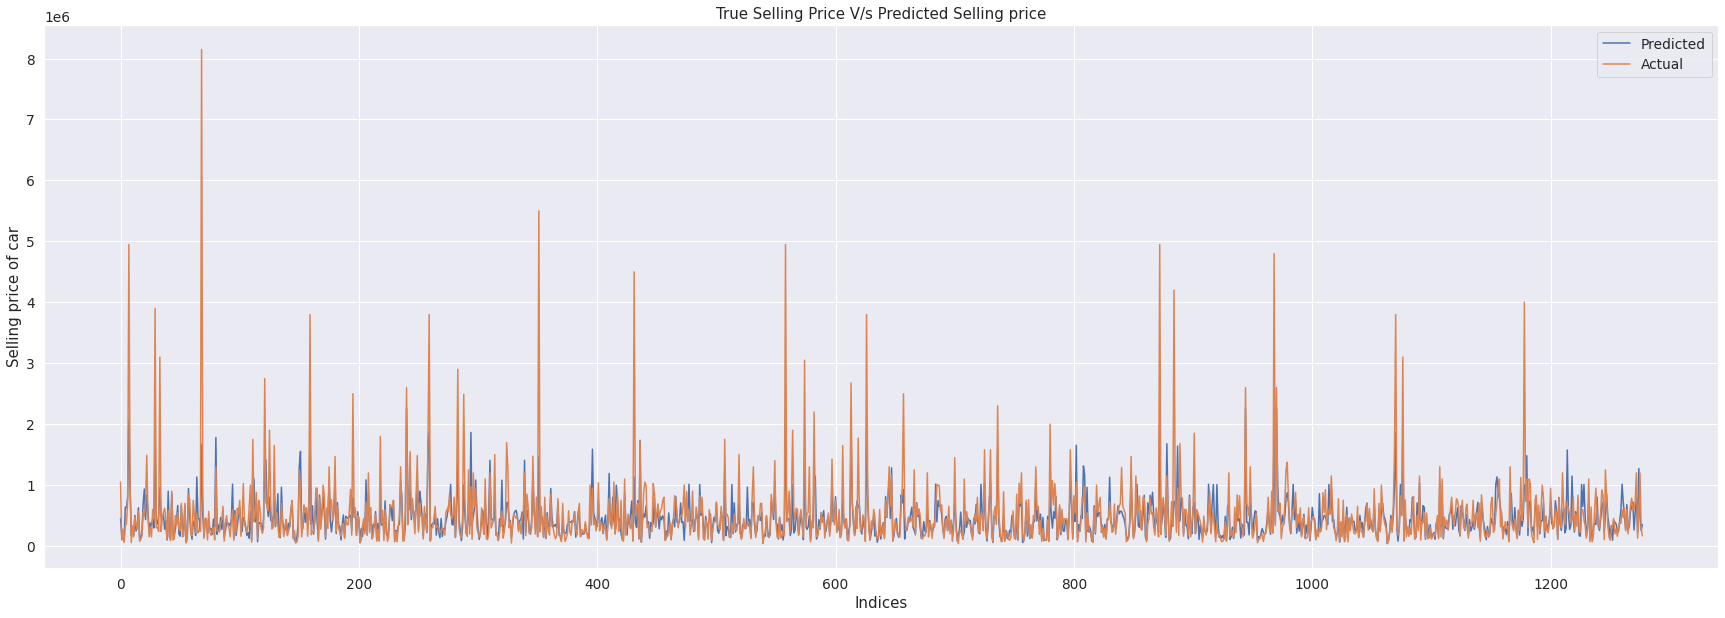

In [ ]:
plt.figure(figsize=(30,10))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('Indices')
plt.ylabel('Selling price of car')
plt.title('True Selling Price V/s Predicted Selling price')
plt.show()

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 184693704121.56775
RMSE : 429760.0541250521
R2 : 0.49309597515233206
Adjusted R2 :  0.48707096693306495


We can see that implementing Lasso regularization dosen't make a considerable difference in the predicted values

### Ridge Regression (L2 regularization )

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.04172227186543707


In [ ]:
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
y_pred_ridge

array([5.65518298, 5.23779695, 5.35811826, ..., 5.70433429, 5.40036506,
       5.54867943])

In [ ]:
y_pred_lasso

array([5.652937  , 5.23822186, 5.35779202, ..., 5.70527994, 5.40473994,
       5.5480803 ])

In [ ]:
y_pred

array([5.65004683, 5.23989058, 5.36000777, ..., 5.70838881, 5.39723158,
       5.54566908])

In [ ]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 183309841937.9591
RMSE : 428146.9863702874
R2 : 0.4968940759811723
Adjusted R2 :  0.49091421159109105


We can conclude that, there is no need of implementing regularization and the values predicted by Linear regression model are in association with the required standards and parameters mentioned 